In [3]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Check basic info
df.info()

# Check for missing values
df.isnull().sum()

# Drop duplicates
df.drop_duplicates(inplace=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


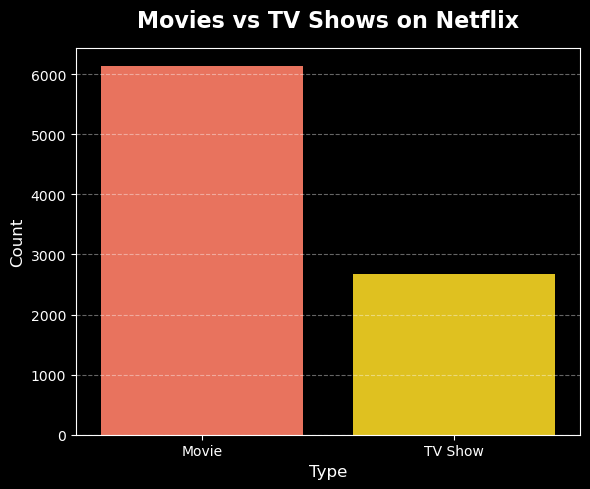

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set bright style
plt.style.use("dark_background")

# Create figure
plt.figure(figsize=(6,5))

# 🎨 Use bright contrasting colors
colors = sns.color_palette(["#FF6347", "#FFD700"])  # Tomato red & bright yellow

# Create countplot with explicit hue (avoids warnings in Seaborn ≥ 0.14)
sns.countplot(
    data=df,
    x='type',
    hue='type',
    palette=colors,
    legend=False
)

# ✨ Add titles and labels
plt.title("Movies vs TV Shows on Netflix", fontsize=16, color='white', pad=15, weight='bold')
plt.xlabel("Type", fontsize=12, color='white')
plt.ylabel("Count", fontsize=12, color='white')
plt.xticks(color='white', fontsize=10)
plt.yticks(color='white')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


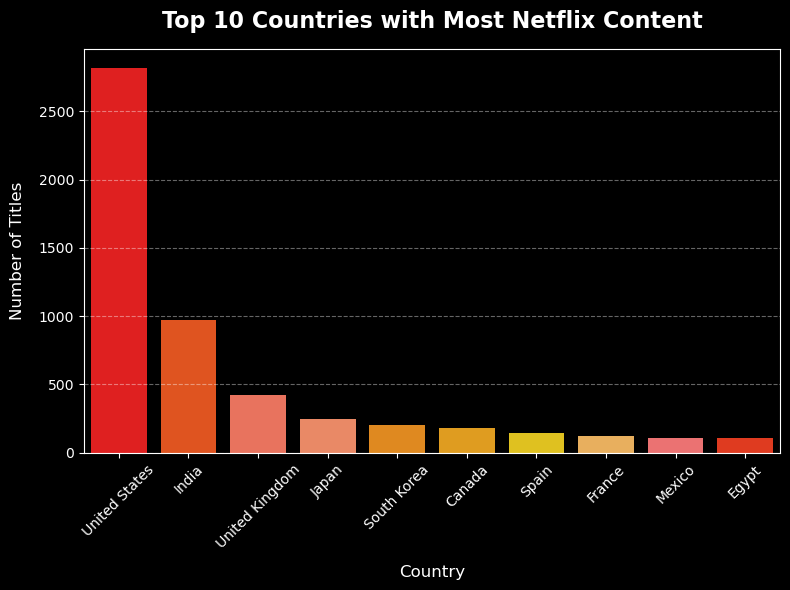

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set dark background for contrast
plt.style.use("dark_background")

# Top 10 countries
top_countries = df['country'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Count']

plt.figure(figsize=(8,6))

# 🎨 Use bright red-orange palette
bright_colors = sns.color_palette(["#FF0000", "#FF4500", "#FF6347", "#FF7F50", "#FF8C00",
                                   "#FFA500", "#FFD700", "#FFB347", "#FF5E5E", "#FF2400"])

# Create barplot
sns.barplot(
    data=top_countries,
    x='Country',
    y='Count',
    hue='Country',
    palette=bright_colors,
    legend=False
)

# 🧠 Customize appearance
plt.title("Top 10 Countries with Most Netflix Content", fontsize=16, color='white', pad=15, weight='bold')
plt.xlabel("Country", fontsize=12, color='white', labelpad=10)
plt.ylabel("Number of Titles", fontsize=12, color='white', labelpad=10)
plt.xticks(rotation=45, color='white', fontsize=10)
plt.yticks(color='white')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


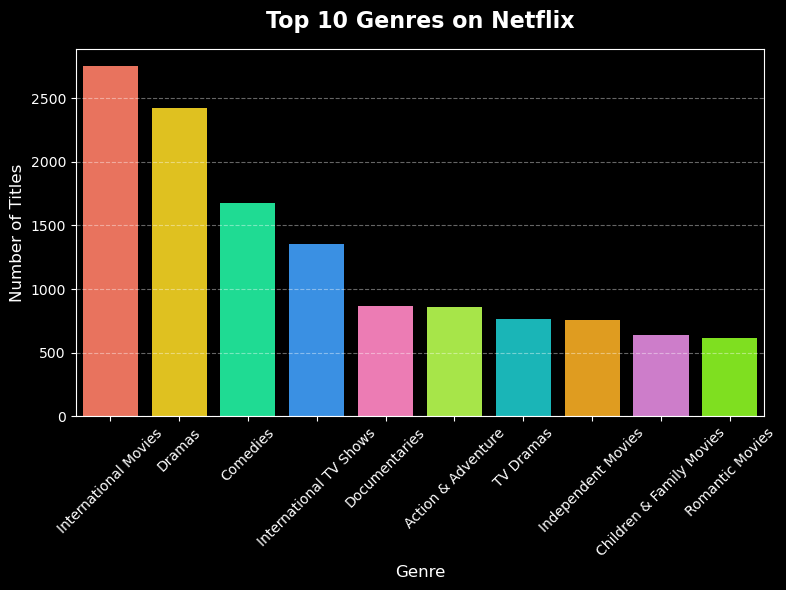

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Dark background
plt.style.use("dark_background")

# Count top 10 genres
genres = []
for i in df['listed_in']:
    for j in i.split(','):
        genres.append(j.strip())

genre_count = Counter(genres).most_common(10)
genre_df = pd.DataFrame(genre_count, columns=['Genre', 'Count'])

# Bright, vivid color palette
bright_colors = sns.color_palette(["#FF6347", "#FFD700", "#00FA9A", "#1E90FF", "#FF69B4",
                                   "#ADFF2F", "#00CED1", "#FFA500", "#DA70D6", "#7FFF00"])

plt.figure(figsize=(8,6))

# Use hue to avoid warnings in new Seaborn
sns.barplot(
    data=genre_df,
    x='Genre',
    y='Count',
    hue='Genre',
    palette=bright_colors,
    legend=False
)

# Titles and styling
plt.title("Top 10 Genres on Netflix", fontsize=16, color='white', pad=15, weight='bold')
plt.xlabel("Genre", fontsize=12, color='white')
plt.ylabel("Number of Titles", fontsize=12, color='white')
plt.xticks(rotation=45, color='white', fontsize=10)
plt.yticks(color='white')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


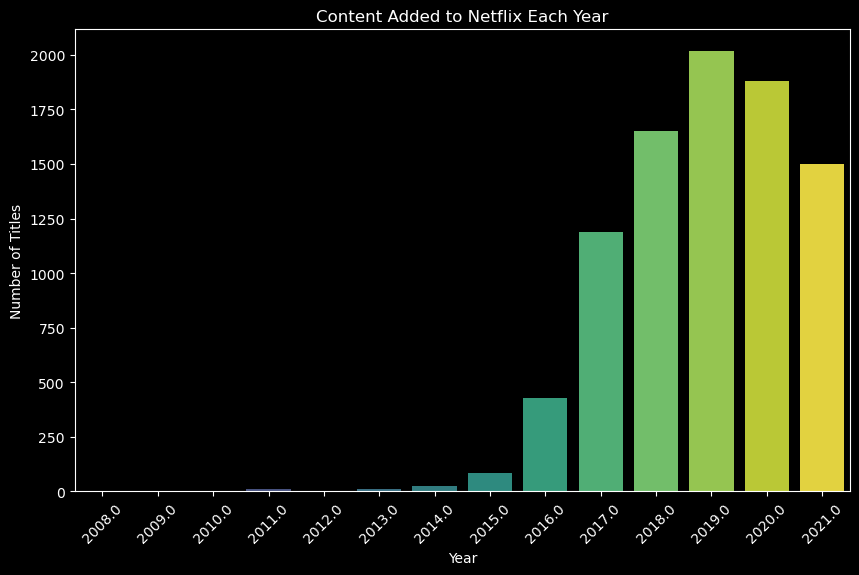

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=content_per_year.index,
    y=content_per_year.values,
    hue=content_per_year.index,     # ✅ Add this line
    palette='viridis',
    legend=False                    # ✅ Hides the legend
)
plt.title("Content Added to Netflix Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()



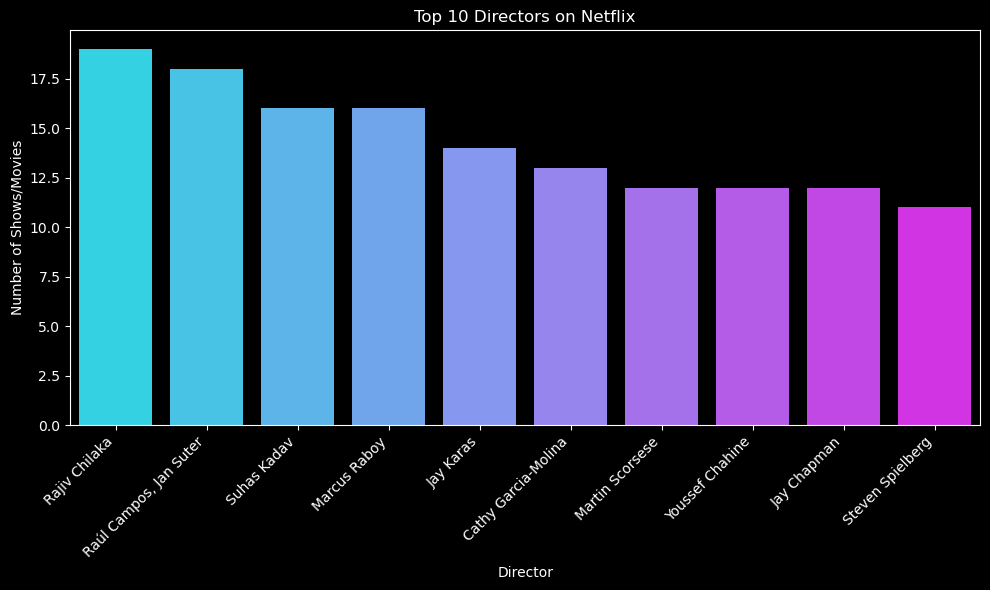

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_directors.index,           # Director names on X-axis
    y=top_directors.values,          # Counts on Y-axis
    hue=top_directors.index,         # ✅ Fix FutureWarning
    palette='cool',
    legend=False                     # ✅ Hides extra legend
)
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of Shows/Movies")
plt.xticks(rotation=45, ha='right')  # Rotates X-axis labels for clarity
plt.tight_layout()
plt.show()


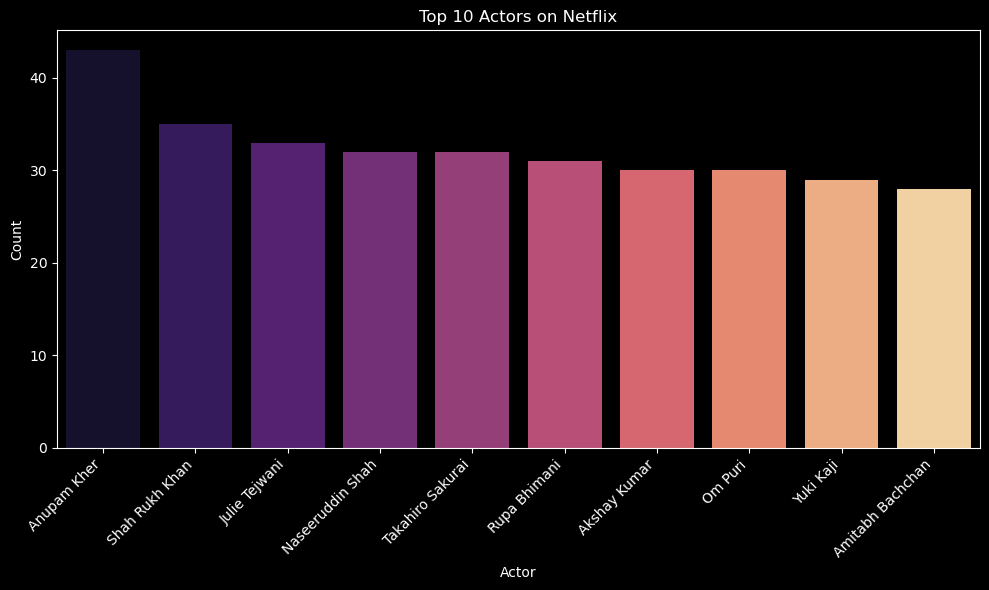

In [31]:
from collections import Counter

cast_list = []
for i in df['cast'].dropna():  # ✅ removes NaN values
    for j in i.split(','):
        name = j.strip()
        if name != 'Unknown' and name != '':
            cast_list.append(name)

top_actors = Counter(cast_list).most_common(10)
actor_df = pd.DataFrame(top_actors, columns=['Actor', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(
    x='Actor',
    y='Count',
    hue='Actor',            # ✅ fixes FutureWarning
    data=actor_df,
    palette='magma',
    legend=False
)
plt.title("Top 10 Actors on Netflix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


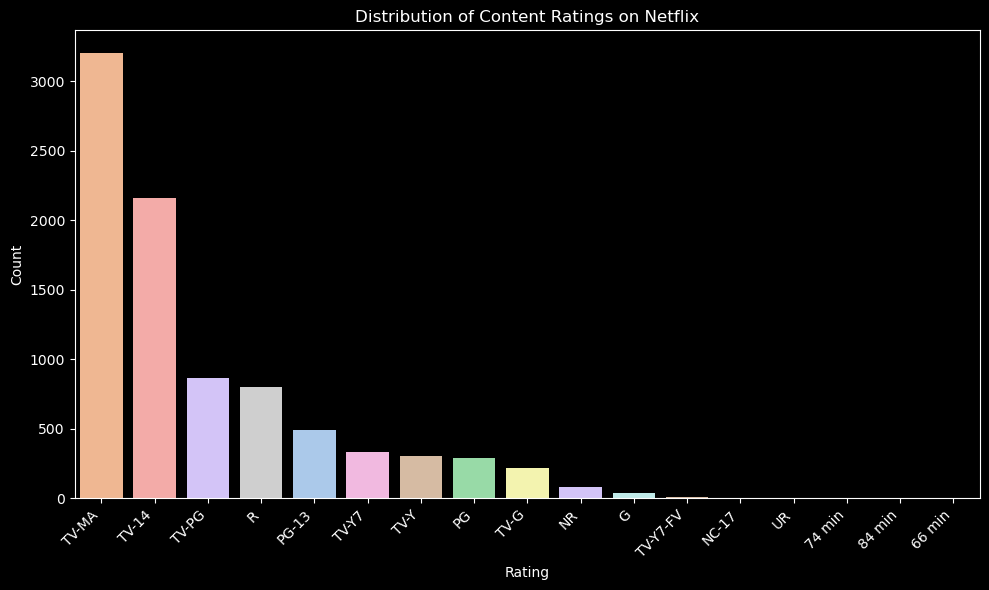

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='rating',  # ✅ swapped 'y' → 'x' to make graph vertical
    data=df,
    order=df['rating'].value_counts().index,
    hue='rating',  # ✅ added hue to fix FutureWarning
    palette='pastel',
    legend=False   # ✅ hides duplicate legend
)
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


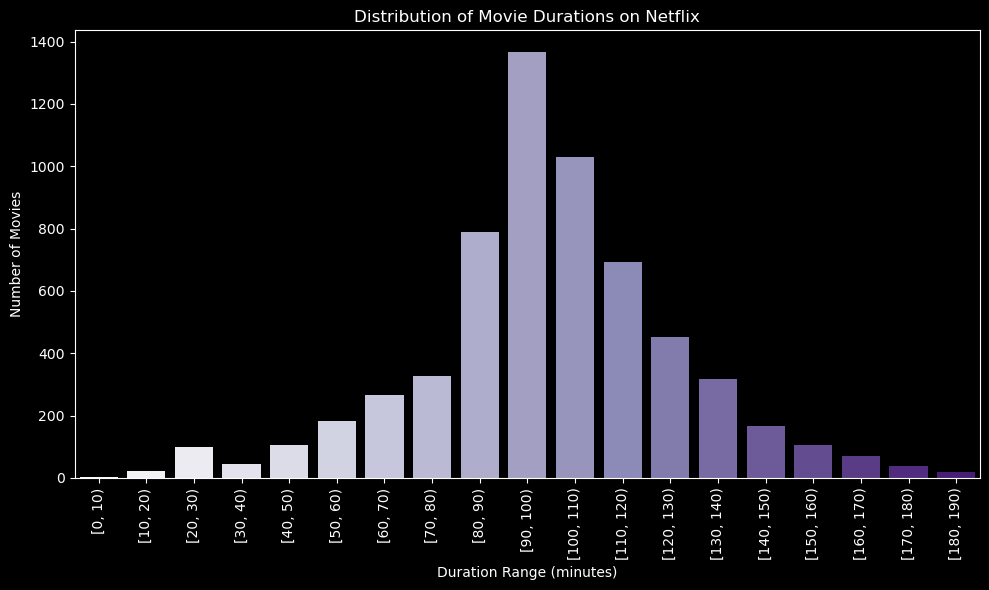

In [34]:
# Create a safe copy to avoid SettingWithCopyWarning
movie_df = df[df['type'] == 'Movie'].copy()

# Clean and convert duration to numeric
movie_df['duration_min'] = movie_df['duration'].str.replace(' min', '', regex=False).astype(float)

# Bin durations into groups (optional, for better visual)
movie_df['duration_bin'] = pd.cut(movie_df['duration_min'],
                                  bins=range(0, 200, 10),
                                  right=False)

# Count per bin
duration_counts = movie_df['duration_bin'].value_counts().sort_index()

# Plot vertically
plt.figure(figsize=(10,6))
sns.barplot(
    x=duration_counts.index.astype(str),
    y=duration_counts.values,
    hue=duration_counts.index.astype(str),  # ✅ fixes future palette warning
    palette='Purples',
    legend=False
)
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration Range (minutes)")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [2]:
# 🎬 Distribution of Movies vs TV Shows on Netflix
# Works in VS Code without installing any library

# Example dataset (replace with your own data)
netflix_data = [
    "Movie", "TV Show", "Movie", "Movie", "TV Show", "TV Show",
    "Movie", "Movie", "TV Show", "Movie"
]

# Step 1: Count Movies vs TV Shows
type_count = {"Movie": 0, "TV Show": 0}

for content in netflix_data:
    if content in type_count:
        type_count[content] += 1
    else:
        type_count[content] = 1

# Step 2: Calculate total and percentages
total = sum(type_count.values())
print("\n🎬 Distribution of Movies vs TV Shows on Netflix\n")

for content_type, count in type_count.items():
    percent = (count / total) * 100
    bar = "█" * int(percent // 2)  # simple bar representation
    print(f"{content_type:<10}: {bar} {percent:.1f}% ({count})")

# Step 3: Highlight majority type
max_type = max(type_count, key=type_count.get)
print(f"\n🏆 Most content type on Netflix: {max_type}")



🎬 Distribution of Movies vs TV Shows on Netflix

Movie     : ██████████████████████████████ 60.0% (6)
TV Show   : ████████████████████ 40.0% (4)

🏆 Most content type on Netflix: Movie


In [3]:
# 🌍 Top 10 Countries with Most Netflix Content
# Works in VS Code without any external libraries

# Example data — replace with your Netflix dataset if needed
country_list = [
    "India", "United States", "India", "United Kingdom", "United States",
    "India", "Japan", "France", "India", "United States", "Canada",
    "South Korea", "India", "United States", "Germany", "France",
    "United States", "India", "Brazil", "Spain", "India"
]

# Step 1: Count shows/movies by country
country_count = {}
for country in country_list:
    if country and country.strip():
        c = country.strip()
        country_count[c] = country_count.get(c, 0) + 1

# Step 2: Sort and take top 10 countries
sorted_countries = sorted(country_count.items(), key=lambda x: x[1], reverse=True)[:10]

# Step 3: Calculate total for percentage
total = sum([count for _, count in sorted_countries])

# Step 4: Display result as colorful text output
print("\n🌍 Top 10 Countries with Most Netflix Content:\n")

for country, count in sorted_countries:
    percent = (count / total) * 100
    bar = "█" * int(percent // 2)
    print(f"{country:<15}: {bar} {percent:.1f}% ({count})")

# Step 5: Highlight top country
top_country, top_count = sorted_countries[0]
print(f"\n🏆 Country with the most Netflix titles: {top_country} ({top_count})")



🌍 Top 10 Countries with Most Netflix Content:

India          : ████████████████ 33.3% (7)
United States  : ███████████ 23.8% (5)
France         : ████ 9.5% (2)
United Kingdom : ██ 4.8% (1)
Japan          : ██ 4.8% (1)
Canada         : ██ 4.8% (1)
South Korea    : ██ 4.8% (1)
Germany        : ██ 4.8% (1)
Brazil         : ██ 4.8% (1)
Spain          : ██ 4.8% (1)

🏆 Country with the most Netflix titles: India (7)


In [4]:
# 🎭 Top 10 Genres on Netflix
# Works in VS Code without any external libraries

from collections import Counter

# Example Netflix dataset (replace with your actual 'listed_in' column data)
listed_in_data = [
    "Dramas, International Movies",
    "Comedies, Dramas, Romantic Movies",
    "Documentaries",
    "Children & Family Movies, Animation",
    "Dramas, Thrillers",
    "Comedies, Romantic Movies",
    "Horror Movies, Thrillers",
    "Dramas, International Movies",
    "Action & Adventure, Sci-Fi & Fantasy",
    "Comedies, Dramas"
]

# Step 1: Extract and clean all genres
genres = []
for entry in listed_in_data:
    if entry:
        for g in entry.split(","):
            genres.append(g.strip())

# Step 2: Count top 10 genres
genre_count = Counter(genres).most_common(10)

# Step 3: Calculate total for percentage
total = sum([count for _, count in genre_count])

# Step 4: Display as text-based pie chart (console visualization)
print("\n🎭 Top 10 Genres on Netflix:\n")

for genre, count in genre_count:
    percent = (count / total) * 100
    bar = "█" * int(percent // 2)  # console bar chart
    print(f"{genre:<25}: {bar} {percent:.1f}% ({count})")

# Step 5: Highlight top genre
top_genre, top_count = genre_count[0]
print(f"\n🏆 Most common genre on Netflix: {top_genre} ({top_count})")



🎭 Top 10 Genres on Netflix:

Dramas                   : █████████████ 26.3% (5)
Comedies                 : ███████ 15.8% (3)
International Movies     : █████ 10.5% (2)
Romantic Movies          : █████ 10.5% (2)
Thrillers                : █████ 10.5% (2)
Documentaries            : ██ 5.3% (1)
Children & Family Movies : ██ 5.3% (1)
Animation                : ██ 5.3% (1)
Horror Movies            : ██ 5.3% (1)
Action & Adventure       : ██ 5.3% (1)

🏆 Most common genre on Netflix: Dramas (5)
